# Conduct Quantitative Analysis

In this section, we calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [52]:
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import matplotlib.pyplot as plt
import datetime as dt
import hvplot.pandas
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Create a path to the portfolio CSV files
csv1path='df_Manufacturing_other.csv'
csv2path='df_Resources.csv'
csv3path='df_Renewable.csv'

In [54]:
#Read the df_Manufacturing_other and clean the data.
df_Manufacturing_other = pd.read_csv(csv1path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True).dropna()
df_Manufacturing_other.head(10)

,TSLA,RIVN,ON,LCID,OLED,ALGM,POWI,WOLF,ENS,AEIS,BE,VICR,HASI,NVTS,GGR,LICY
NaN,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close
2022-01-03 05:00:00+00:00,1199.78,102.72,70.17,40.93,171.41,36.41,92.54,121.14,81.1,92.82,22.14,123.98,54.06,16.26,9.93,10.07
2022-01-04 05:00:00+00:00,1149.59,101.39,70.95,39.41,175.26,35.28,91.53,121.7,82.21,92.9,21.55,126.18,53.64,15.61,9.88,9.99
2022-01-05 05:00:00+00:00,1088.12,90.01,67.42,36.68,166.11,33.21,86.63,114.46,79.72,89.42,20.21,123.14,49.86,14.45,9.93,9.12
2022-01-06 05:00:00+00:00,1064.7,87.33,67.25,38.22,164.74,32.97,87.75,113.05,79.13,91.8,19.47,120.0,49.42,13.5,9.94,8.8
2022-01-07 05:00:00+00:00,1026.96,86.28,64.56,41.98,158.85,32.17,85.11,108.97,78.85,89.57,19.25,115.94,49.0,13.13,9.9,9.02
2022-01-10 05:00:00+00:00,1058.12,81.44,65.12,41.72,160.13,32.23,85.05,106.77,78.36,88.79,19.13,111.75,47.89,13.03,9.9,8.69
2022-01-11 05:00:00+00:00,1064.4,83.55,65.93,45.47,161.97,32.46,85.64,108.91,79.87,90.25,19.65,115.08,48.72,12.6,9.92,8.99
2022-01-12 05:00:00+00:00,1106.22,86.48,66.49,45.43,162.0,32.13,84.42,110.5,79.9,92.23,19.18,112.62,48.56,12.41,9.92,9.54
2022-01-13 05:00:00+00:00,1031.56,80.31,64.64,41.41,157.82,30.81,83.41,105.14,80.48,92.13,18.31,108.77,46.2,11.63,9.92,9.55


In [55]:
 # drop the 1st raw
df_Manufacturing_other = df_Manufacturing_other[1:]
df_Manufacturing_other
df_Manufacturing_other = df_Manufacturing_other[1:]
df_Manufacturing_other

,TSLA,RIVN,ON,LCID,OLED,ALGM,POWI,WOLF,ENS,AEIS,BE,VICR,HASI,NVTS,GGR,LICY
2022-01-04 05:00:00+00:00,1149.59,101.39,70.95,39.41,175.26,35.28,91.53,121.7,82.21,92.9,21.55,126.18,53.64,15.61,9.88,9.99
2022-01-05 05:00:00+00:00,1088.12,90.01,67.42,36.68,166.11,33.21,86.63,114.46,79.72,89.42,20.21,123.14,49.86,14.45,9.93,9.12
2022-01-06 05:00:00+00:00,1064.7,87.33,67.25,38.22,164.74,32.97,87.75,113.05,79.13,91.8,19.47,120.0,49.42,13.5,9.94,8.8
2022-01-07 05:00:00+00:00,1026.96,86.28,64.56,41.98,158.85,32.17,85.11,108.97,78.85,89.57,19.25,115.94,49.0,13.13,9.9,9.02
2022-01-10 05:00:00+00:00,1058.12,81.44,65.12,41.72,160.13,32.23,85.05,106.77,78.36,88.79,19.13,111.75,47.89,13.03,9.9,8.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,251.6,23.66,93.37,5.54,156.05,31.89,76.76,37.98,93.67,102.23,12.19,58.18,19.68,6.95,2.61,3.41
2023-10-03 04:00:00+00:00,246.53,21.69,89.76,5.38,153.86,29.98,75.49,33.82,93.33,98.95,11.54,56.33,16.5,6.68,2.57,3.23
2023-10-04 04:00:00+00:00,261.16,23.69,89.99,5.56,156.15,30.92,75.79,34.77,93.11,99.18,11.38,56.97,15.42,6.73,2.5,3.12
2023-10-05 04:00:00+00:00,260.05,18.27,88.17,5.16,155.68,30.37,75.1,32.8,92.63,97.68,10.74,56.62,14.36,6.32,2.57,2.95


In [56]:
#Read the df_Resources and clean the data.
df_Resources = pd.read_csv(csv2path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True).dropna()
df_Resources.head(10)

,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG
NaN,close,close,close,close,close,close,close,close,close,close,close
2022-01-03 05:00:00+00:00,236.67,213.09,25.52,47.65,50.73,34.87,19.87,10.16,12.63,9.66,9.92
2022-01-04 05:00:00+00:00,242.58,216.7,26.43,50.4,49.1,34.85,19.52,10.42,12.57,9.66,9.92
2022-01-05 05:00:00+00:00,235.64,213.06,24.2,45.51,47.66,30.23,18.16,10.28,12.01,9.66,9.9
2022-01-06 05:00:00+00:00,233.38,210.69,23.73,45.31,49.06,28.06,17.35,9.96,11.89,9.69,9.89
2022-01-07 05:00:00+00:00,236.02,214.63,23.8,45.52,49.96,27.4,16.89,9.9,11.65,9.69,9.89
2022-01-10 05:00:00+00:00,226.97,204.65,23.48,45.72,48.36,26.05,15.78,9.7,11.12,9.69,9.89
2022-01-11 05:00:00+00:00,240.17,208.75,24.73,47.72,51.87,26.92,16.21,10.04,11.31,9.69,9.89
2022-01-12 05:00:00+00:00,241.07,207.9,25.39,49.44,55.63,25.82,15.99,10.2,11.23,9.69,9.895
2022-01-13 05:00:00+00:00,235.23,206.93,24.52,45.89,55.55,24.6,14.79,9.9,11.06,9.69,9.89


In [57]:
 # drop the 1st raw
df_Resources = df_Resources[1:]
df_Resources
df_Resources = df_Resources[1:]
df_Resources

,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG
2022-01-04 05:00:00+00:00,242.58,216.7,26.43,50.4,49.1,34.85,19.52,10.42,12.57,9.66,9.92
2022-01-05 05:00:00+00:00,235.64,213.06,24.2,45.51,47.66,30.23,18.16,10.28,12.01,9.66,9.9
2022-01-06 05:00:00+00:00,233.38,210.69,23.73,45.31,49.06,28.06,17.35,9.96,11.89,9.69,9.89
2022-01-07 05:00:00+00:00,236.02,214.63,23.8,45.52,49.96,27.4,16.89,9.9,11.65,9.69,9.89
2022-01-10 05:00:00+00:00,226.97,204.65,23.48,45.72,48.36,26.05,15.78,9.7,11.12,9.69,9.89
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,162.41,167.17,17.44,18.53,56.24,22.38,4.75,9.17,3.43,4.16,2.39
2023-10-03 04:00:00+00:00,156.77,167.38,16.82,17.6,54.56,20.42,4.38,9.33,3.4,3.92,2.55
2023-10-04 04:00:00+00:00,158.4,179.0,17.38,17.36,55.04,21.1,4.4,9.5,3.52,3.82,2.19
2023-10-05 04:00:00+00:00,155.03,179.0,16.88,16.83,53.07,20.62,4.16,9.53,3.41,3.83,2.14


In [58]:
#Read the df_Renewables and clean the data.
df_Renewables = pd.read_csv(csv3path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True)

# drop column with nulls
df_Renewables = df_Renewables.drop(columns=["NXT"])

df_Renewables.head(10)

,FSLR,ENPH,SEDG,BEP,ARRY,ORA,PLUG,SHLS,ITRI,RUN,...,CWEN,RNW,AMRC,NOVA,SPWR,CLNE,AMPS,STEM,FCEL,MAXN
NaN,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 05:00:00+00:00,88.58,184.45,282.45,35.85,15.91,78.55,28.79,23.84,68.92,35.47,...,35.96,7.56,82.11,28.75,21.55,6.54,10.5,19.24,5.78,14.83
2022-01-04 05:00:00+00:00,87.28,178.28,273.1,35.21,14.97,78.83,28.15,22.55,68.95,34.57,...,35.39,7.46,79.6,26.7,21.53,6.63,10.53,18.77,5.88,14.57
2022-01-05 05:00:00+00:00,83.51,157.2,249.81,34.05,13.92,76.82,26.27,21.32,66.95,31.42,...,33.97,7.36,70.55,23.9,19.78,6.07,9.89,16.76,5.32,13.11
2022-01-06 05:00:00+00:00,83.97,151.49,248.24,33.42,13.84,76.69,25.22,21.12,65.81,31.48,...,34.16,7.33,70.96,23.82,19.15,6.19,9.94,16.11,5.14,12.81
2022-01-07 05:00:00+00:00,84.68,145.13,248.91,34.12,14.12,75.99,24.96,21.87,64.78,31.72,...,33.86,6.99,67.99,23.99,19.38,6.2,9.53,15.83,5.1,12.62
2022-01-10 05:00:00+00:00,84.3,147.13,255.47,33.91,14.01,75.56,24.75,21.53,64.46,31.52,...,33.15,6.89,65.99,23.88,19.62,6.06,9.28,15.58,4.97,12.31
2022-01-11 05:00:00+00:00,84.45,148.51,261.09,34.47,14.41,77.07,25.1,22.78,64.53,32.73,...,33.61,7.07,66.02,24.47,20.31,6.35,9.87,16.15,5.18,12.64
2022-01-12 05:00:00+00:00,84.12,149.28,261.02,33.83,14.25,76.27,24.65,22.99,64.65,33.25,...,33.42,7.11,65.18,24.61,20.38,6.29,9.81,15.97,5.07,12.87


In [59]:
 # drop the 1st raw
df_Renewables = df_Renewables[1:]
df_Renewables
df_Renewables = df_Renewables[1:]
df_Renewables

,FSLR,ENPH,SEDG,BEP,ARRY,ORA,PLUG,SHLS,ITRI,RUN,...,CWEN,RNW,AMRC,NOVA,SPWR,CLNE,AMPS,STEM,FCEL,MAXN
2022-01-03 05:00:00+00:00,88.58,184.45,282.45,35.85,15.91,78.55,28.79,23.84,68.92,35.47,...,35.96,7.56,82.11,28.75,21.55,6.54,10.5,19.24,5.78,14.83
2022-01-04 05:00:00+00:00,87.28,178.28,273.1,35.21,14.97,78.83,28.15,22.55,68.95,34.57,...,35.39,7.46,79.6,26.7,21.53,6.63,10.53,18.77,5.88,14.57
2022-01-05 05:00:00+00:00,83.51,157.2,249.81,34.05,13.92,76.82,26.27,21.32,66.95,31.42,...,33.97,7.36,70.55,23.9,19.78,6.07,9.89,16.76,5.32,13.11
2022-01-06 05:00:00+00:00,83.97,151.49,248.24,33.42,13.84,76.69,25.22,21.12,65.81,31.48,...,34.16,7.33,70.96,23.82,19.15,6.19,9.94,16.11,5.14,12.81
2022-01-07 05:00:00+00:00,84.68,145.13,248.91,34.12,14.12,75.99,24.96,21.87,64.78,31.72,...,33.86,6.99,67.99,23.99,19.38,6.2,9.53,15.83,5.1,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,156.34,116.84,122.56,20.44,21.36,68.18,6.825,17.14,58.8,11.24,...,19.75,5.06,35.41,9.68,5.62,3.59,4.8,3.86,1.2,10.73
2023-10-03 04:00:00+00:00,151.25,114.22,120.31,20.33,19.545,67.26,6.53,16.47,58.37,10.66,...,19.26,4.92,33.82,9.41,5.475,3.73,4.52,3.69,1.19,10.4
2023-10-04 04:00:00+00:00,151.82,117.18,125.31,20.87,20.33,68.72,6.53,16.62,58.46,10.54,...,19.27,4.93,35.23,9.62,5.47,3.51,4.43,3.73,1.24,10.14
2023-10-05 04:00:00+00:00,145.35,116.01,120.62,21.17,18.83,66.06,6.4,15.1,57.81,10.01,...,18.76,4.82,33.09,8.81,5.45,3.57,4.37,3.71,1.22,9.89


In [60]:
# Check the datatypes of each green portfolio dataframe
data_types1 = df_Renewables.dtypes

print(data_types1)

FSLR    object
ENPH    object
SEDG    object
BEP     object
ARRY    object
ORA     object
PLUG    object
SHLS    object
ITRI    object
RUN     object
NEP     object
AY      object
CWEN    object
RNW     object
AMRC    object
NOVA    object
SPWR    object
CLNE    object
AMPS    object
STEM    object
FCEL    object
MAXN    object
dtype: object


In [61]:
data_types2 = df_Resources.dtypes

print(data_types2)

ALB     object
AYI     object
LTHM    object
MP      object
SQM     object
FLNC    object
CHPT    object
MNTK    object
BLDP    object
LNZA    object
ALLG    object
dtype: object


In [62]:
data_types3 = df_Manufacturing_other.dtypes

print(data_types3)

TSLA    object
RIVN    object
ON      object
LCID    object
OLED    object
ALGM    object
POWI    object
WOLF    object
ENS     object
AEIS    object
BE      object
VICR    object
HASI    object
NVTS    object
GGR     object
LICY    object
dtype: object


In [63]:
# set datatypes as float for each green portfolio to calculate Daily Returns
df_Renewables = df_Renewables.astype({col: float if col != df_Renewables.index.name else col for col in df_Renewables.columns})

df_Resources = df_Resources.astype({col: float if col != df_Resources.index.name else col for col in df_Resources.columns})

df_Manufacturing_other = df_Manufacturing_other.astype({col: float if col != df_Manufacturing_other.index.name else col for col in df_Manufacturing_other.columns})

In [64]:
# Calculate Daily Returns of Green Portfolios
df_Resources_DR = df_Resources.pct_change()
df_Renewables_DR = df_Renewables.pct_change()
df_Manufacturing_other_DR = df_Manufacturing_other.pct_change()
df_Resources_DR

,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG
2022-01-04 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05 05:00:00+00:00,-0.028609,-0.016797,-0.084374,-0.097024,-0.029328,-0.132568,-0.069672,-0.013436,-0.044551,0.000000,-0.002016
2022-01-06 05:00:00+00:00,-0.009591,-0.011124,-0.019421,-0.004395,0.029375,-0.071783,-0.044604,-0.031128,-0.009992,0.003106,-0.001010
2022-01-07 05:00:00+00:00,0.011312,0.018700,0.002950,0.004635,0.018345,-0.023521,-0.026513,-0.006024,-0.020185,0.000000,0.000000
2022-01-10 05:00:00+00:00,-0.038344,-0.046499,-0.013445,0.004394,-0.032026,-0.049270,-0.065719,-0.020202,-0.045494,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,-0.044872,-0.018437,-0.052689,-0.029843,-0.057483,-0.026533,-0.044266,0.006586,-0.065395,-0.109208,0.076577
2023-10-03 04:00:00+00:00,-0.034727,0.001256,-0.035550,-0.050189,-0.029872,-0.087578,-0.077895,0.017448,-0.008746,-0.057692,0.066946
2023-10-04 04:00:00+00:00,0.010397,0.069423,0.033294,-0.013636,0.008798,0.033301,0.004566,0.018221,0.035294,-0.025510,-0.141176
2023-10-05 04:00:00+00:00,-0.021275,0.000000,-0.028769,-0.030530,-0.035792,-0.022749,-0.054545,0.003158,-0.031250,0.002618,-0.022831


In [65]:
# take average of stock returns for each portfolio
df_Resources_DR['Resources_Portfolio_Return'] = df_Resources_DR.mean(axis=1)
df_Renewables_DR['Renewables_Portfolio_Return'] = df_Renewables_DR.mean(axis=1)
df_Manufacturing_other_DR['MO_Portfolio_Return'] = df_Manufacturing_other_DR.mean(axis=1)
df_Resources_DR

,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG,Resources_Portfolio_Return
2022-01-04 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05 05:00:00+00:00,-0.028609,-0.016797,-0.084374,-0.097024,-0.029328,-0.132568,-0.069672,-0.013436,-0.044551,0.000000,-0.002016,-0.047125
2022-01-06 05:00:00+00:00,-0.009591,-0.011124,-0.019421,-0.004395,0.029375,-0.071783,-0.044604,-0.031128,-0.009992,0.003106,-0.001010,-0.015506
2022-01-07 05:00:00+00:00,0.011312,0.018700,0.002950,0.004635,0.018345,-0.023521,-0.026513,-0.006024,-0.020185,0.000000,0.000000,-0.001846
2022-01-10 05:00:00+00:00,-0.038344,-0.046499,-0.013445,0.004394,-0.032026,-0.049270,-0.065719,-0.020202,-0.045494,0.000000,0.000000,-0.027873
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,-0.044872,-0.018437,-0.052689,-0.029843,-0.057483,-0.026533,-0.044266,0.006586,-0.065395,-0.109208,0.076577,-0.033233
2023-10-03 04:00:00+00:00,-0.034727,0.001256,-0.035550,-0.050189,-0.029872,-0.087578,-0.077895,0.017448,-0.008746,-0.057692,0.066946,-0.026964
2023-10-04 04:00:00+00:00,0.010397,0.069423,0.033294,-0.013636,0.008798,0.033301,0.004566,0.018221,0.035294,-0.025510,-0.141176,0.002997
2023-10-05 04:00:00+00:00,-0.021275,0.000000,-0.028769,-0.030530,-0.035792,-0.022749,-0.054545,0.003158,-0.031250,0.002618,-0.022831,-0.021997


In [66]:
# remove first rows with no data
df_Resources_DR = df_Resources_DR[1:]
df_Renewables_DR = df_Renewables_DR[1:]
df_Manufacturing_other_DR = df_Manufacturing_other_DR[1:]
df_Resources_DR

,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG,Resources_Portfolio_Return
2022-01-05 05:00:00+00:00,-0.028609,-0.016797,-0.084374,-0.097024,-0.029328,-0.132568,-0.069672,-0.013436,-0.044551,0.000000,-0.002016,-0.047125
2022-01-06 05:00:00+00:00,-0.009591,-0.011124,-0.019421,-0.004395,0.029375,-0.071783,-0.044604,-0.031128,-0.009992,0.003106,-0.001010,-0.015506
2022-01-07 05:00:00+00:00,0.011312,0.018700,0.002950,0.004635,0.018345,-0.023521,-0.026513,-0.006024,-0.020185,0.000000,0.000000,-0.001846
2022-01-10 05:00:00+00:00,-0.038344,-0.046499,-0.013445,0.004394,-0.032026,-0.049270,-0.065719,-0.020202,-0.045494,0.000000,0.000000,-0.027873
2022-01-11 05:00:00+00:00,0.058157,0.020034,0.053237,0.043745,0.072581,0.033397,0.027250,0.035052,0.017086,0.000000,0.000000,0.032776
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,-0.044872,-0.018437,-0.052689,-0.029843,-0.057483,-0.026533,-0.044266,0.006586,-0.065395,-0.109208,0.076577,-0.033233
2023-10-03 04:00:00+00:00,-0.034727,0.001256,-0.035550,-0.050189,-0.029872,-0.087578,-0.077895,0.017448,-0.008746,-0.057692,0.066946,-0.026964
2023-10-04 04:00:00+00:00,0.010397,0.069423,0.033294,-0.013636,0.008798,0.033301,0.004566,0.018221,0.035294,-0.025510,-0.141176,0.002997
2023-10-05 04:00:00+00:00,-0.021275,0.000000,-0.028769,-0.030530,-0.035792,-0.022749,-0.054545,0.003158,-0.031250,0.002618,-0.022831,-0.021997


In [67]:
# manipulate green portfolio data frames to only show total portfolio returns

df_Resources_DR = df_Resources_DR['Resources_Portfolio_Return']
df_Renewables_DR = df_Renewables_DR['Renewables_Portfolio_Return']
df_Manufacturing_other_DR = df_Manufacturing_other_DR['MO_Portfolio_Return']
print(df_Resources_DR)

2022-01-05 05:00:00+00:00   -0.047125
2022-01-06 05:00:00+00:00   -0.015506
2022-01-07 05:00:00+00:00   -0.001846
2022-01-10 05:00:00+00:00   -0.027873
2022-01-11 05:00:00+00:00    0.032776
                               ...   
2023-10-02 04:00:00+00:00   -0.033233
2023-10-03 04:00:00+00:00   -0.026964
2023-10-04 04:00:00+00:00    0.002997
2023-10-05 04:00:00+00:00   -0.021997
2023-10-06 04:00:00+00:00    0.016472
Name: Resources_Portfolio_Return, Length: 440, dtype: float64


#### Calculate and Plot cumulative returns.

In [115]:
# Combine green portfolio returns dataframes

combined_green_portfolios = pd.concat([df_Resources_DR, df_Renewables_DR, df_Manufacturing_other_DR], axis=1)
combined_green_portfolios

#remove the timestamp from the date column
combined_green_portfolios.index = pd.to_datetime(combined_green_portfolios.index)

combined_green_portfolios.index = combined_green_portfolios.index.date

combined_green_portfolios

,Resources_Portfolio_Return,Renewables_Portfolio_Return,MO_Portfolio_Return
2022-01-05,-0.047125,-0.066425,-0.055592
2022-01-06,-0.015506,-0.011582,-0.011141
2022-01-07,-0.001846,-0.005614,-0.012699
2022-01-10,-0.027873,-0.009566,-0.009900
2022-01-11,0.032776,0.023669,0.018334
...,...,...,...
2023-10-04,0.002997,0.006269,0.009005
2023-10-05,-0.021997,-0.030913,-0.040661
2023-10-06,0.016472,0.037348,0.015359
2022-01-04,NaN,-0.019889,NaN


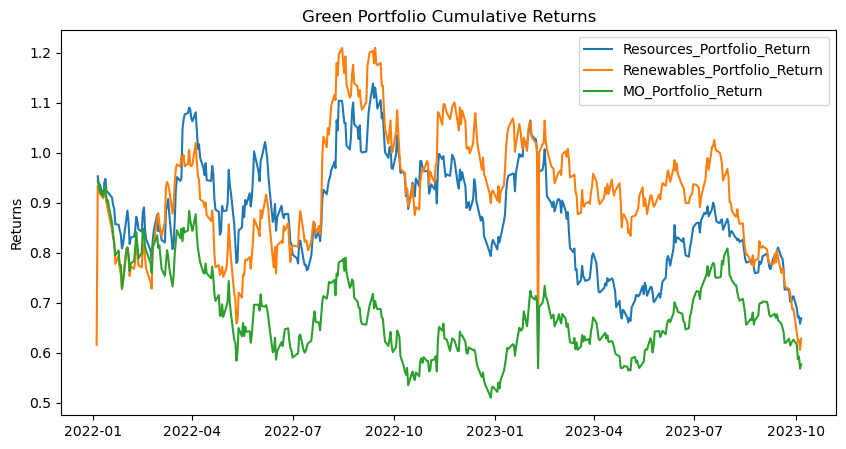

In [117]:
# Calculate cumulative returns of all green portfolios

cumulative_returns = (1 + combined_green_portfolios).cumprod()

# Plot cumulative returns for three green portfolios
cumulative_returns.plot(figsize=(10,5))
plt.title('Green Portfolio Cumulative Returns')
plt.ylabel('Returns')
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Calculate the standard deviation for all portfolios.
2.  Create a box plot for each portfolio. 
4. Determine which portfolios are riskier than the S&P TSX 500.
5. Calculate the Annualized Standard Deviation.

### Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all green portfolios
green_cumulative_returns_SD = cumulative_returns.std()

green_cumulative_returns_SD

Resources_Portfolio_Return     0.106264
Renewables_Portfolio_Return    0.118754
MO_Portfolio_Return            0.085191
dtype: float64

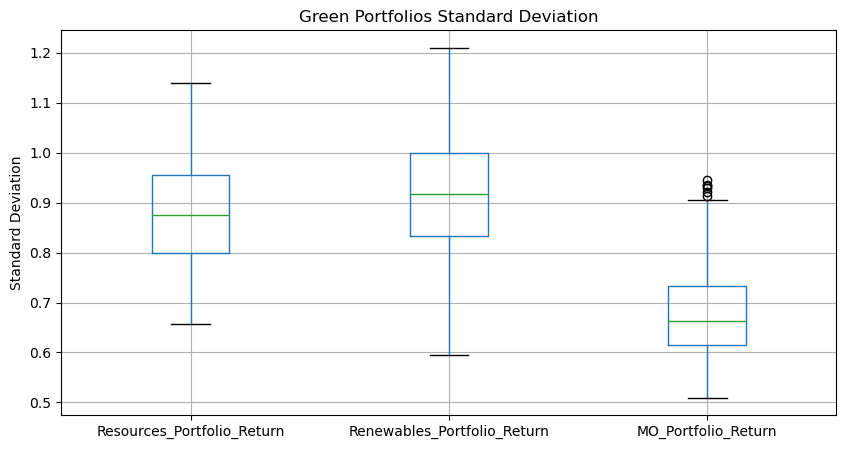

In [118]:
# Box plot to visually show risk of Resources Portfolio
cumulative_returns.boxplot(figsize=(10,5))
plt.title('Green Portfolios Standard Deviation')
plt.ylabel('Standard Deviation')
plt.show()

### Determine which portfolios are riskier than the S&P 500

In [75]:
# load in CSV for S&P 500 and First Trust NASDAQ Clean Index and remove first row

csv4path=('index_df.csv')

index_df = pd.read_csv(csv4path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True).dropna()

# remove first row
index_df = index_df[1:]

# ensure data types are correct for calculating standard deviation and returns

index_df = index_df.astype({col: float if col != index_df.index.name else col for col in index_df.columns})

# calculate daily returns for S&P 500 and First Trust NASDAQ Clean Index

index_df_DR = index_df.pct_change()

# Calculate the daily standard deviation of S&P 500 and First Trust NASDAQ Clean Index

index_df_SD = index_df_DR.std()

print(index_df_SD)
print(green_cumulative_returns_SD)

QQQ     0.017157
QCLN    0.026469
dtype: float64
Resources_Portfolio_Return     0.106264
Renewables_Portfolio_Return    0.118754
MO_Portfolio_Return            0.085191
dtype: float64


In [76]:
# Determine which portfolios are riskier than the S&P 500 and/or First Trust NASDAQ Clean Index

# All three green portfolios are more risky than that of the S&P 500 and First Trust NASDAQ Clean Index. The Manufacturing and Other Portfolio is least risky out of the three green portfolios. 

### Calculate the Annualized Standard Deviation

In [77]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = index_df_SD * np.sqrt(252)
annualized_std.head()

QQQ     0.272354
QCLN    0.420175
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P 500.

### Calculate and plot rolling `std` for all portfolios with 21-day window

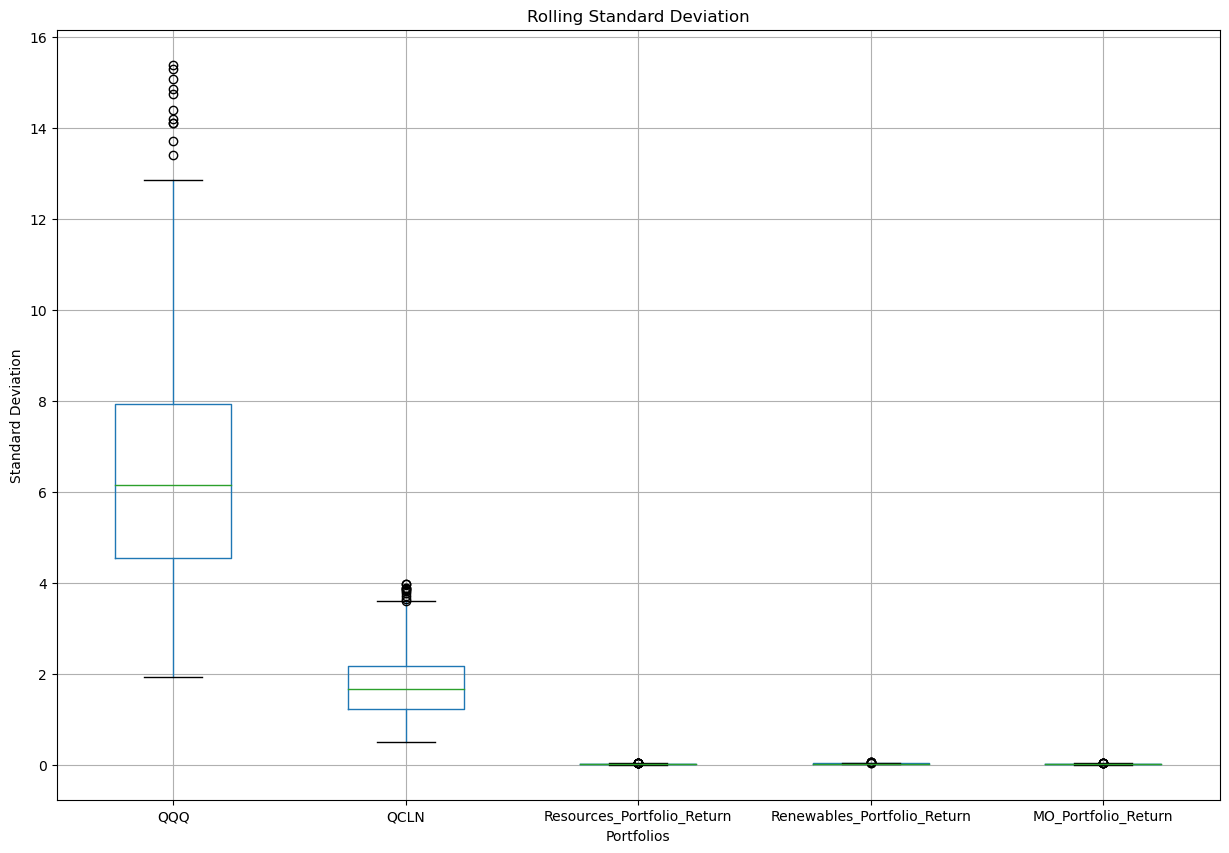

In [120]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df = pd.concat([index_df, df_Resources_DR, df_Renewables_DR, df_Manufacturing_other_DR], axis="columns", join="inner")

rolling_std_deviation = combined_df.rolling(window=10).std()
rolling_std_deviation

# Plot the rolling standard deviation
rolling_std_deviation.boxplot(figsize=(15,10))
plt.title('Rolling Standard Deviation')
plt.xlabel('Portfolios')
plt.ylabel('Standard Deviation')
plt.show()

### Calculate and plot the correlation

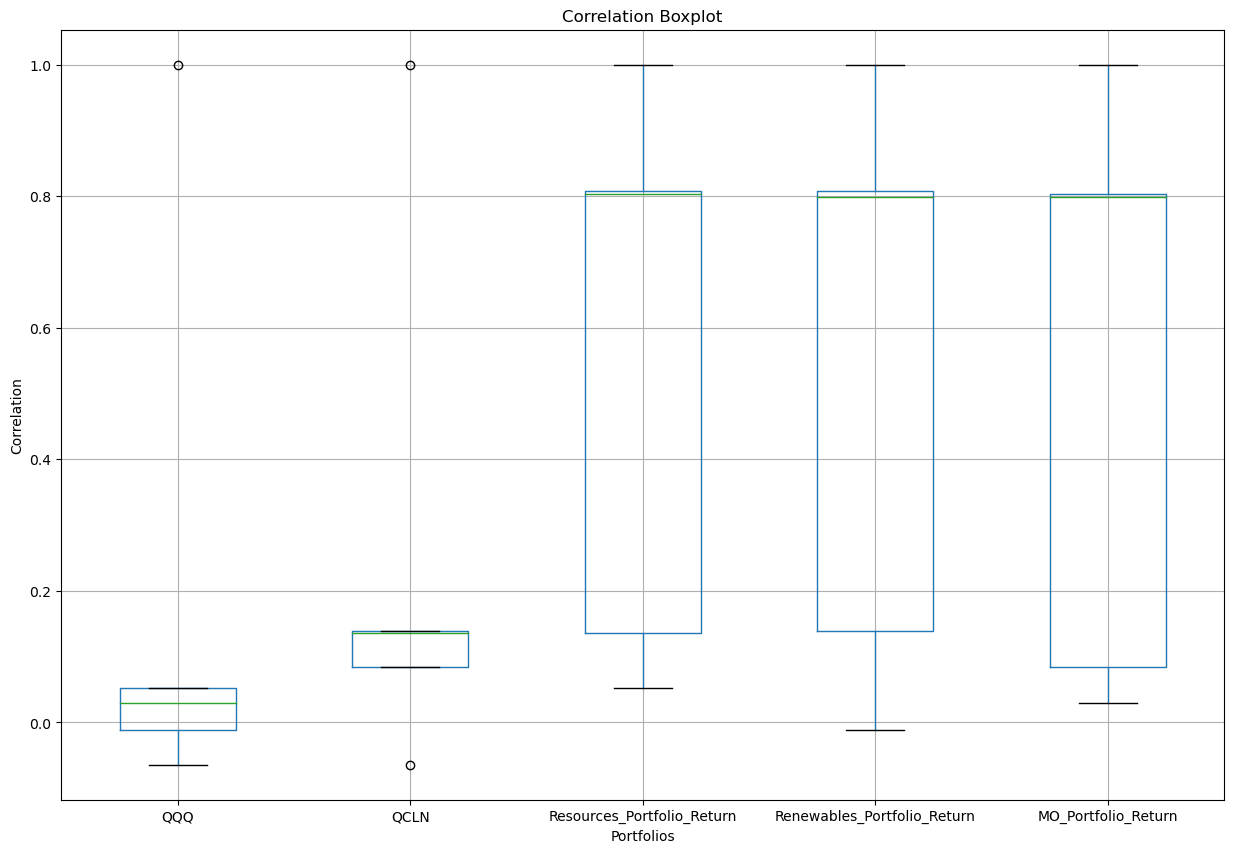

In [121]:
# Calculate the correlation
correlation =combined_df.corr() 
correlation

# Display de correlation matrix
correlation.boxplot(figsize=(15,10))
plt.title('Correlation Boxplot')
plt.xlabel('Portfolios')
plt.ylabel('Correlation')
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [90]:
# Calculate covariance of a single portfolio
covariance_matrix = combined_df.cov()

sp_var = combined_df['QQQ'].var()
sp_var

1268.5066480177056

In [91]:
# Calculate variance of the Resources Portfolio
Resources_covariance = combined_df['Resources_Portfolio_Return'].var()
Resources_covariance

0.000751223439580013

In [92]:
# Computing beta
Resources_variance = combined_df.var()
Resources_beta = Resources_covariance / covariance_matrix 
Resources_beta

,QQQ,QCLN,Resources_Portfolio_Return,Renewables_Portfolio_Return,MO_Portfolio_Return
QQQ,5.922109e-07,-0.000054,0.014698,-0.060678,0.025705
QCLN,-5.386726e-05,0.000020,0.033175,0.029851,0.052929
Resources_Portfolio_Return,1.469834e-02,0.033175,1.000000,1.141028,1.241039
Renewables_Portfolio_Return,-6.067844e-02,0.029851,1.141028,0.848070,1.148387
MO_Portfolio_Return,2.570455e-02,0.052929,1.241039,1.148387,0.991856


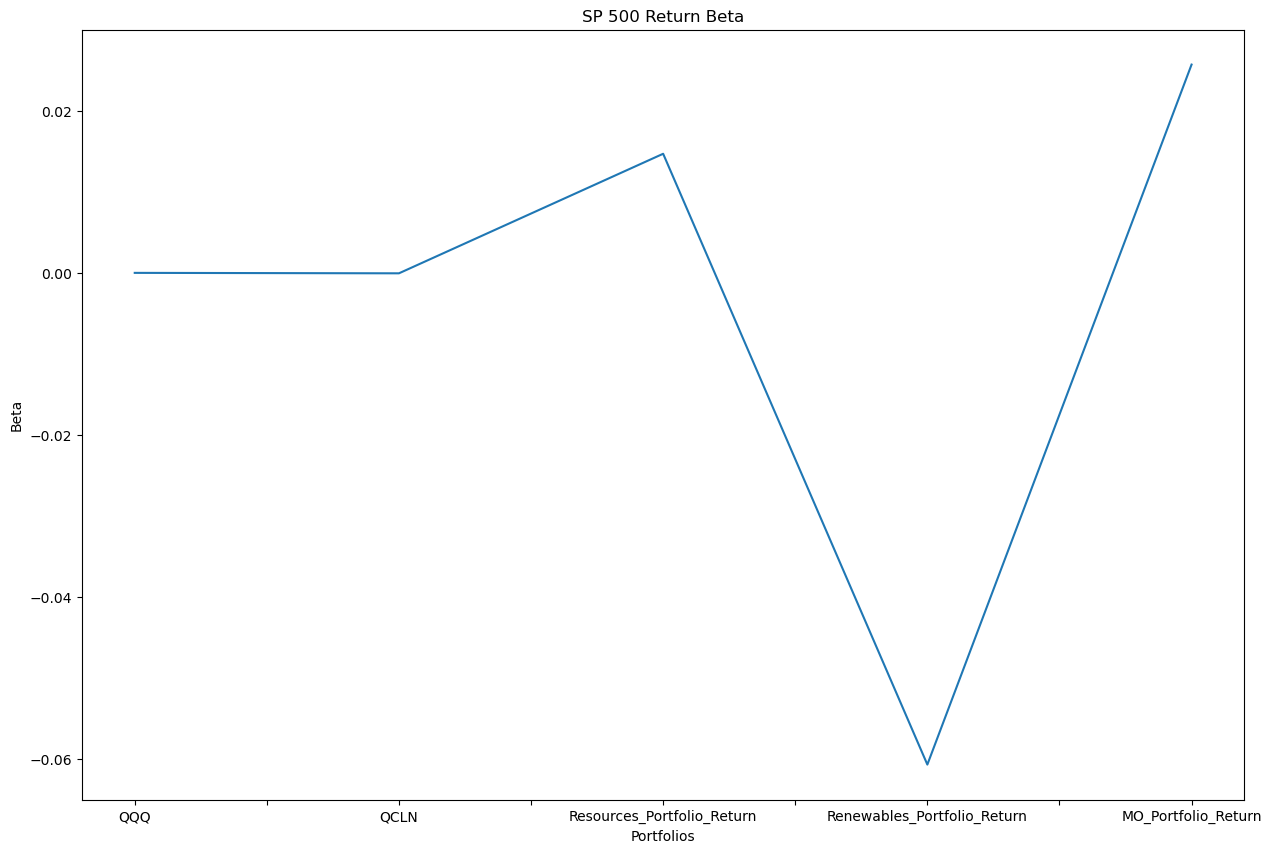

In [122]:
# Plot beta trend
Resources_beta['QQQ'].plot(figsize=(15,10), title='SP 500 Return Beta')
plt.xlabel('Portfolios')
plt.ylabel('Beta')
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [94]:
# Use `ewm` to calculate the rolling window
half_life = 21
alpha = 1 - 0.5 ** (1 / half_life)
cumulative_returns_ewm = cumulative_returns.ewm(alpha=alpha).std()
cumulative_returns_ewm


,Resources_Portfolio_Return,Renewables_Portfolio_Return,MO_Portfolio_Return
2022-01-05 05:00:00+00:00,NaN,NaN,NaN
2022-01-06 05:00:00+00:00,0.010448,0.007646,0.007440
2022-01-07 05:00:00+00:00,0.009006,0.008129,0.011203
2022-01-10 05:00:00+00:00,0.017821,0.010327,0.013735
2022-01-11 05:00:00+00:00,0.015569,0.009974,0.011823
...,...,...,...
2023-10-04 04:00:00+00:00,0.059971,0.102638,0.052322
2023-10-05 04:00:00+00:00,0.062541,0.106918,0.054457
2023-10-06 04:00:00+00:00,0.064143,0.109368,0.055809
2022-01-04 05:00:00+00:00,0.064143,0.112031,0.055809


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Annualized Sharpe Ratios
# to create a combined average returns for all data frames
combined_average_returns_portfolios = pd.concat([index_df_DR, combined_green_portfolios], axis=1).dropna()
combined_average_returns_portfolios

,QQQ,QCLN,Resources_Portfolio_Return,Renewables_Portfolio_Return,MO_Portfolio_Return
2022-01-05 05:00:00+00:00,-0.030721,-0.055475,-0.047125,-0.066425,-0.055592
2022-01-06 05:00:00+00:00,-0.000703,-0.012268,-0.015506,-0.011582,-0.011141
2022-01-07 05:00:00+00:00,-0.010833,-0.012731,-0.001846,-0.005614,-0.012699
2022-01-10 05:00:00+00:00,0.000658,-0.008806,-0.027873,-0.009566,-0.009900
2022-01-11 05:00:00+00:00,0.015022,0.023481,0.032776,0.023669,0.018334
...,...,...,...,...,...
2023-10-02 04:00:00+00:00,0.008346,-0.029557,-0.033233,-0.068982,-0.016009
2023-10-03 04:00:00+00:00,-0.017550,-0.036500,-0.026964,-0.030891,-0.047521
2023-10-04 04:00:00+00:00,0.013609,0.021074,0.002997,0.006269,0.009005
2023-10-05 04:00:00+00:00,-0.002946,-0.044472,-0.021997,-0.030913,-0.040661


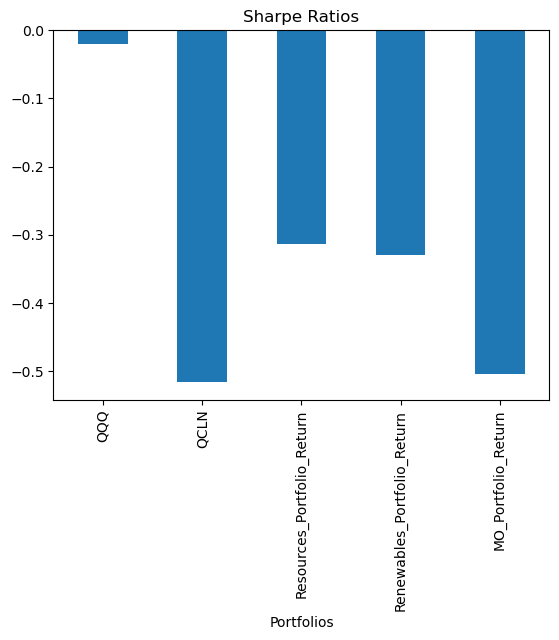

In [107]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = (combined_average_returns_portfolios.mean() * 252) / (combined_average_returns_portfolios.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", xlabel = 'Portfolios')
plt.xlabel('Portfolios')
plt.show()

In [97]:
# Additional correlation Visualization using Seaborn Library 

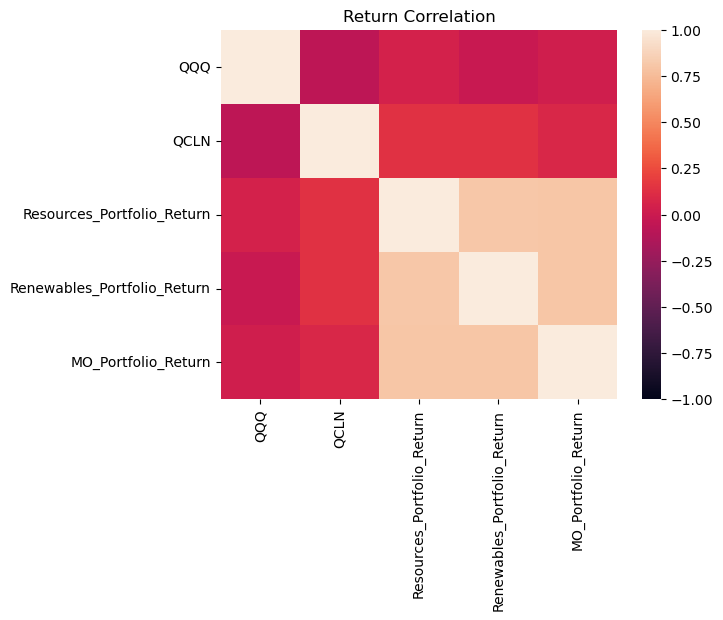

In [103]:
import seaborn as sns
return_correlation = combined_df.corr()

# Display the correlation matrix

sns.heatmap(return_correlation, vmin=-1, vmax=1)
plt.title('Return Correlation')

# Display the heatmap
plt.show()